In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [2]:
students = pd.DataFrame({
    "name": ['rahul', 'harikesh', 'vishnu', 'paru', 'vidu', 'maa'],
    "age": [22, 23, 10, 15, 21, 45],
    "marks": [60, 70, 30, 43, 50, 90],
    "is_boy": [1, 1, 1, 0, 0, 0],
    "salary": [900, 800, 400, 4500, 6000, 8500],
})

students

,name,age,marks,is_boy,salary
0,rahul,22,60,1,900
1,harikesh,23,70,1,800
2,vishnu,10,30,1,400
3,paru,15,43,0,4500
4,vidu,21,50,0,6000
5,maa,45,90,0,8500


In [3]:
corr = students.iloc[:, 1:].corr().abs()
corr

,age,marks,is_boy,salary
age,1.00,0.94,0.40,0.70
marks,0.94,1.00,0.20,0.49
is_boy,0.40,0.20,1.00,0.92
salary,0.70,0.49,0.92,1.00


Create an upper triangular matrix

`k` - have 0s on diagonals

In [4]:
np.triu([7, 8, 9], k=1)

array([[0, 8, 9],
       [0, 0, 9],
       [0, 0, 0]])

In [5]:
mask1 = np.triu(np.ones(corr.shape), k=1).astype(bool)
mask2 = corr >= 0.5
corr.where(mask1 & mask2).fillna('-')

,age,marks,is_boy,salary
age,-,0.94,-,0.70
marks,-,-,-,-
is_boy,-,-,-,0.92
salary,-,-,-,-


In [6]:
corr_stacked = corr.where(mask1 & mask2).stack().dropna().sort_values(ascending=False)
corr_stacked

age     marks    0.94
is_boy  salary   0.92
age     salary   0.70
dtype: float64

In [7]:
relevant_pairs = list(corr_stacked.index)
relevant_pairs

[('age', 'marks'), ('is_boy', 'salary'), ('age', 'salary')]

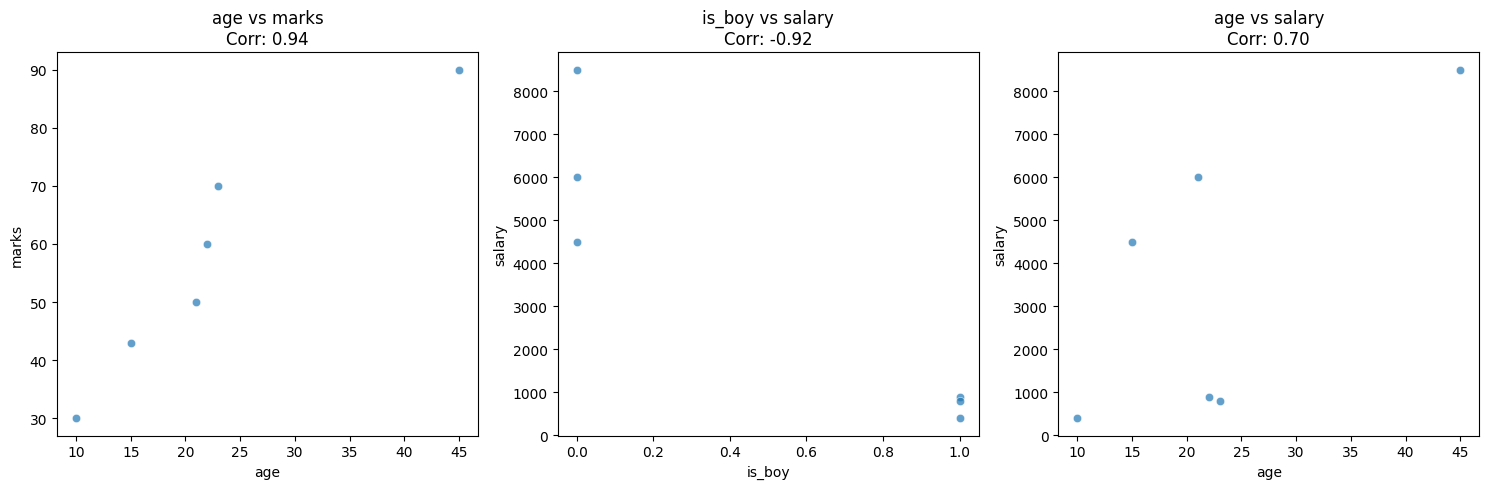

In [8]:
# Calculate grid dimensions
n_plots = len(relevant_pairs)
n_cols = 4
n_rows = math.ceil(n_plots/n_cols)

# Create a figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten for easy access

# Draw the scatter plots for each pair
for i, (col_x, col_y) in enumerate(relevant_pairs):
  _ = sns.scatterplot(data=students, x=col_x, y=col_y, ax=axes[i], alpha=0.7)
  correlation = students[col_x].corr(students[col_y])
  _ = axes[i].set_title(f'{col_x} vs {col_y}\nCorr: {correlation:.2f}')

# Delete the empty axes, if any
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()